In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 11.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=e422d0f65c777e16b0b0c3e618bca2fa2f81a96dee3a3f3e5fe11e8ff211a4ba
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
import os
import shutil
import random
import string

In [ ]:
!cp -r /content/drive/MyDrive/PersianFace /content/

In [ ]:
# def generate_random_name(length=10):
#     letters_and_digits = string.ascii_letters + string.digits
#     return ''.join(random.choice(letters_and_digits) for _ in range(length))

# def rename_and_save(directory):
#     for filename in os.listdir(directory):
#         original_path = os.path.join(directory, filename)

#         if os.path.isfile(original_path):
#             # Check if the filename contains Persian characters
#             if any('\u0600' <= char <= '\u06FF' for char in filename):
#                 # Generate a random name
#                 new_filename = generate_random_name() + os.path.splitext(filename)[1]

#                 # Construct the new path
#                 new_path = os.path.join(directory, new_filename)

#                 # Rename and move the file
#                 shutil.move(original_path, new_path)
#                 print(f'Renamed: {filename} -> {new_filename}')

# main_path = '/content/PersianFace'
# # Replace 'your_directory_path' with the path to your directory containing the image files
# for path in os.listdir(main_path):
#   directory_path = os.path.join(main_path, path)
#   rename_and_save(directory_path)


In [ ]:
import pandas as pd
import cv2 as cv
import os
from deepface import DeepFace

24-01-02 16:27:54 - Directory /root/.deepface created
24-01-02 16:27:54 - Directory /root/.deepface/weights created


## Write generate_dataset function to convert images to feature vectors using deepface package

In [ ]:
def generate_dataset(dataset_path: str, save_df: bool = True, df_name_to_save: str = 'extracted_features.csv') -> pd.DataFrame | None:
    subjects_list = os.listdir(dataset_path)
    subject_feature = {}
    all_features = []

    for subject in subjects_list:
        print(f'{subject}...')
        for image in os.listdir(f'{dataset_path}/{subject}'):
            # TODO: Extract features with deepface
            try:
              encoded_features = DeepFace.represent(img_path=os.path.join(
                  dataset_path, subject, image), model_name='ArcFace', enforce_detection=False)
              subject_feature['subject'] = subject
              for i in range(len(encoded_features[0]['embedding'])):
                  subject_feature[f'feature{i + 1}'] = encoded_features[0]['embedding'][i]
              all_features.append(subject_feature.copy())
              subject_feature = {}

            except ValueError:
              print(f'the {image} has non-english characters!')

    df = pd.DataFrame(all_features)

    if save_df:
        df.to_csv(df_name_to_save, index=False)
    else:
        return df


### save dataset as a file e.g. .csv, .json, .npy

In [ ]:
generate_dataset('/content/drive/MyDrive/PersianFace', True, 'persian_faces.csv')

In [ ]:
!cp /content/persian_faces.csv /content/drive/MyDrive

In [ ]:
data = pd.read_csv('persian_faces.csv')
data.head(10)

,subject,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512
0,Bahram_Radan,0.102778,0.437245,0.134822,0.136755,0.125465,0.077529,0.205965,-0.155207,0.372008,...,-0.029600,0.217094,0.173018,0.077989,0.186178,-0.378087,-0.067210,0.032544,0.509354,0.153284
1,Bahram_Radan,0.177933,0.109854,0.366296,0.102263,0.098167,0.074980,0.071582,-0.139025,0.177708,...,0.103600,0.013510,-0.030703,-0.030513,0.011550,-0.300933,-0.041198,0.230124,0.356375,0.103245
2,Bahram_Radan,0.062198,0.274320,0.102746,0.187975,0.236909,0.005364,0.194683,-0.192909,0.569764,...,-0.032854,0.166887,-0.004103,-0.022593,0.283998,-0.319368,-0.075604,-0.294131,0.374689,0.201105
3,Bahram_Radan,0.088835,0.424528,0.151462,0.125330,0.001228,0.109901,0.283745,-0.213615,0.411674,...,-0.018013,0.178114,0.146300,-0.058956,0.282110,-0.216787,-0.049504,0.195647,0.581767,0.276889
4,Bahram_Radan,0.000480,0.052611,0.010193,0.238618,0.061057,0.009372,0.291541,-0.245720,0.464194,...,-0.012067,0.099531,-0.059220,-0.213212,0.100678,-0.270852,0.099874,-0.123306,0.273968,0.273129
5,Bahram_Radan,0.157432,0.216765,-0.134859,0.096747,-0.012789,-0.352048,0.244958,0.036474,0.667517,...,-0.285651,0.290213,0.161446,-0.217920,-0.172645,-0.364299,0.187331,0.242365,0.288665,0.251481
6,Bahram_Radan,0.073447,0.351501,-0.103153,0.435452,-0.046963,-0.115954,0.299775,0.005007,0.368944,...,-0.028571,0.455826,0.097950,-0.080077,0.096251,-0.414671,0.115533,-0.239013,0.043664,0.209796
7,Bahram_Radan,0.149442,0.165184,0.081816,0.156120,0.085409,-0.011272,0.183842,-0.045523,0.379540,...,-0.059416,0.084246,0.213696,-0.092442,-0.013437,-0.147825,-0.014791,0.279366,0.216061,0.411996
8,Bahram_Radan,0.129394,0.116418,0.064034,-0.010133,0.238529,0.059575,0.056559,-0.032822,0.300478,...,0.155157,-0.064882,0.187091,-0.082263,0.010734,0.005736,0.010406,0.076662,0.342220,0.379173
9,Bahram_Radan,0.156114,-0.031407,0.013325,0.175793,0.157007,0.011022,0.141317,-0.129972,0.390015,...,-0.206629,0.314839,0.109982,-0.030728,0.138913,-0.300709,-0.032447,0.107570,0.469926,0.401848


## Implement a Multi-Layer Perceptron (MLP) neural network model and train it on the dataset

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, sigmoid, softmax
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data = pd.read_csv('./persian_faces.csv')
enc = OneHotEncoder()

X = data.drop(['subject'], axis=1)
Y = data['subject'].to_frame()

enc.fit(Y)
subjects = enc.transform(Y).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, subjects, test_size=.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1180, 512) (295, 512) (1180, 30) (295, 30)


In [ ]:
model = Sequential([
    Dense(len(x_train.columns), relu),
    Dense(256, relu),
    Dense(128, sigmoid),
    Dense(30, softmax)
])

model.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=30)

In [ ]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 8ms/step - loss: 0.4659 - accuracy: 0.8814


[0.46593809127807617, 0.8813559412956238]

## Save your trained network

In [ ]:
model.save('PersianFaces_30ep.keras')

In [ ]:
!cp /content/PersianFaces_30ep.keras /content/drive/MyDrive

## Predict new images with your trained model

In [13]:
from keras.models import Sequential, load_model
import numpy as np

In [8]:
model: Sequential = load_model('/content/drive/MyDrive/PersianFaces_30ep.keras')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 30)                3870      
                                                                 
Total params: 430750 (1.64 MB)
Trainable params: 430750 (1.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
adel = cv.imread('/content/adel-ferdosipour.jpg')

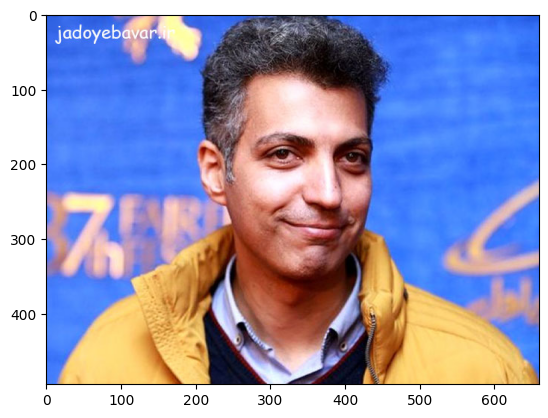

In [22]:
import matplotlib.pyplot as plt
plt.imshow(cv.cvtColor(adel, cv.COLOR_BGR2RGB))

In [23]:
encoded_adel = DeepFace.represent(img_path='/content/adel-ferdosipour.jpg', model_name="ArcFace")

In [24]:
adel_features = np.asarray(encoded_adel[0]["embedding"])
adel_features = adel_features.reshape(-1, 512)
adel_features.shape

(1, 512)

In [25]:
prediction = np.argmax(model.predict(adel_features))
prediction

1/1 [==============================] - 0s 17ms/step


0

In [26]:
subjects = [subject for subject in os.listdir('/content/drive/MyDrive/PersianFace')]
subjects = sorted(subjects)
subjects

['Adel_FerdowsiPour',
 'Ali_Daei',
 'Ali_Khamenei',
 'Asghar_Farhadi',
 'Bahare_Rahnama',
 'Bahram_Radan',
 'Behnam_Bani',
 'Dariush_Arjmand',
 'Ebi',
 'Ehsan_Alikhani',
 'Elham_Hamidi',
 'Elnaz_Shakerdoost',
 'Golshifteh_Farahani',
 'Hamid_Lolaei',
 'Hootan_Shakiba',
 'Javad_Khiabani',
 'Javad_Razavian',
 'Leyla_Hatami',
 'Mahnaz_Afshar',
 'Mehran_Ghafourian',
 'Mehran_Modiri',
 'Mohsen_Chavoshi',
 'Parinaz_Izadyar',
 'Parsa_Pirozfar',
 'Parviz_Parastooee',
 'Shahab_Hosseini',
 'Siamak_Ansari',
 'Siavash_Ghomayshi',
 'Tannaz_Tabatabaee',
 'Taraneh_Alidoosti']

In [27]:
subjects[prediction]

'Adel_FerdowsiPour'